# Práctica 3 Nicolás Corsini, Ignacio Hernández

In [1]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from simpful import *


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [2]:
# Create a fuzzy system object
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



In [3]:
# Define input fuzzy sets and linguistic variables
v1_baja = FuzzySet(points=[[0.0, 1.0],  [1.0, 1.0], [3.0, 0.0]], term="v1_baja")
v1_media = FuzzySet(points=[[1., 0.], [3.0, 1.0], [5., 0.]], term="v1_media")
v1_alta = FuzzySet(points=[[3., 0.],  [5.0, 1.0], [6., 1.]], term="v1_alta")
FS.add_linguistic_variable("V_1", LinguisticVariable([v1_baja, v1_media, v1_alta], concept="V_1"))

v2_baja = FuzzySet(points=[[0.0, 1.0],  [1.0, 1.0], [3.0, 0.0]], term="v2_baja")
v2_media = FuzzySet(points=[[1., 0.], [3.0, 1.0], [5., 0.]], term="v2_media")
v2_alta = FuzzySet(points=[[3., 0.],  [5.0, 1.0], [6., 1.]], term="v2_alta")
FS.add_linguistic_variable("V_2", LinguisticVariable([v2_baja, v2_media, v2_alta], concept="V_2"))

p_muy_poca = FuzzySet(points=[[0.0, 1.0],  [1.0, 1.0], [3.0, 0.0]], term="p_muy_poca")
p_poca = FuzzySet(points=[[1., 0.], [3.0, 1.0], [5., 0.]], term="p_poca")
p_media = FuzzySet(points=[[3., 0.], [5.0, 1.0], [7., 0.]], term="p_media")
p_alta = FuzzySet(points=[[5., 0.],  [7.0, 1.0], [9., 0.]], term="p_alta")
p_muy_alta = FuzzySet(points=[[7., 0.],  [9.0, 1.0], [10., 1.]], term="p_muy_alta")

FS.add_linguistic_variable("P", LinguisticVariable([p_muy_poca, p_poca, p_media, p_alta, p_muy_alta], concept="P"))

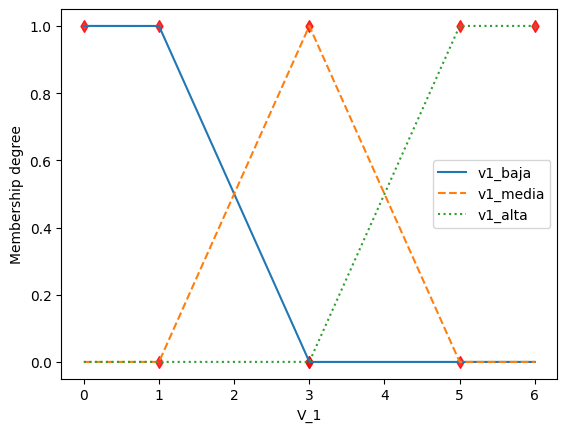

In [4]:
FS.plot_variable('V_1')

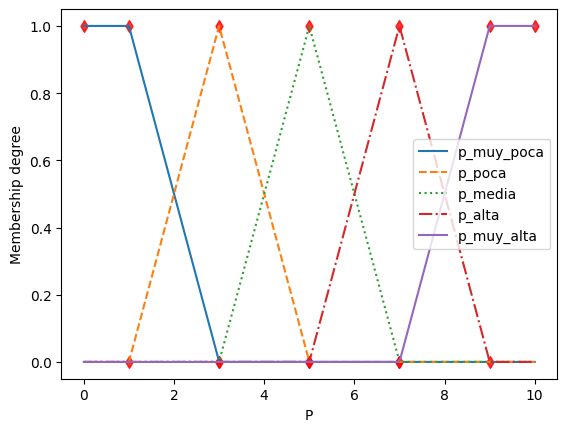

In [9]:
FS.plot_variable('P')

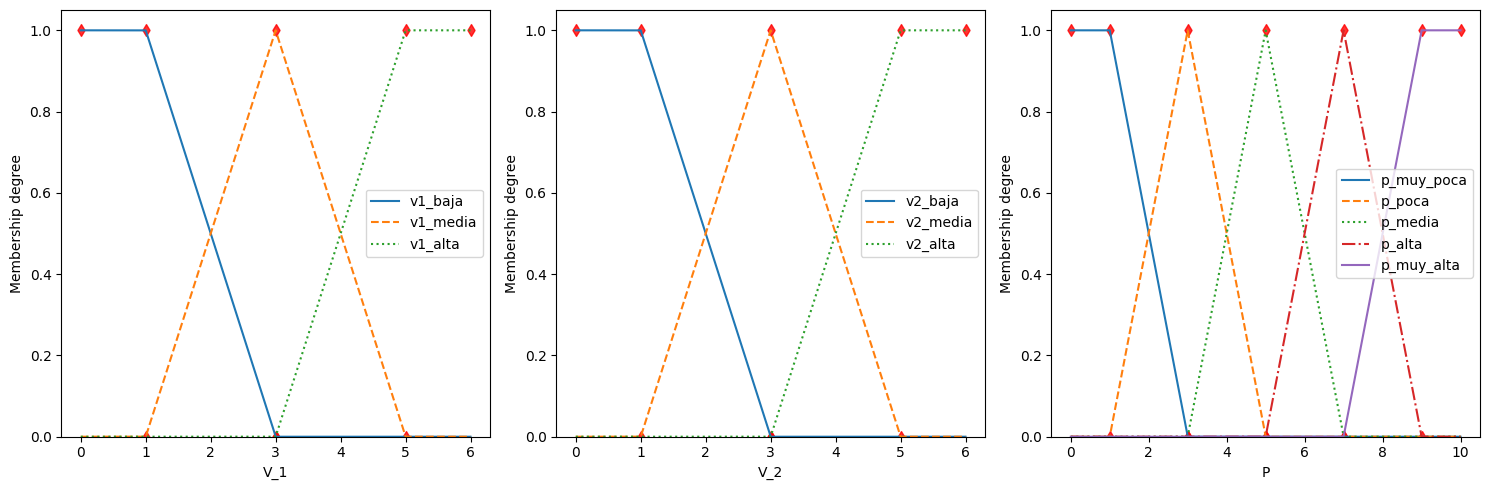

In [5]:
FS.produce_figure()

## Avión 1

In [6]:
# Define fuzzy rules
R1 = "IF (V_1 IS v1_baja)  AND (V_2 IS v2_baja) THEN (P IS p_muy_alta)"
R2 = "IF (V_1 IS v1_baja)  AND (V_2 IS v2_media) THEN (P IS p_alta)"
R3 = "IF (V_1 IS v1_baja)  AND (V_2 IS v2_alta) THEN (P IS p_media)"
R4 = "IF (V_1 IS v1_media)  AND (V_2 IS v2_baja) THEN (P IS p_alta)"
R5 = "IF (V_1 IS v1_media)  AND (V_2 IS v2_media) THEN (P IS p_media)"
R6 = "IF (V_1 IS v1_media)  AND (V_2 IS v2_alta) THEN (P IS p_poca)"
R7 = "IF (V_1 IS v1_alta)  AND (V_2 IS v2_baja) THEN (P IS p_media)"
R8 = "IF (V_1 IS v1_alta)  AND (V_2 IS v2_media) THEN (P IS p_poca)"
R9 = "IF (V_1 IS v1_alta)  AND (V_2 IS v2_alta) THEN (P IS p_muy_poca)"



FS.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9])

In [7]:
# Define facts observed
input_v_1=4.5
input_v_2=3.0


# Set antecedents values
FS.set_variable("V_1", input_v_1)
FS.set_variable("V_2", input_v_2)

In [8]:
# GRado de cumplimiento de reglas
FS.get_firing_strengths()

[0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.75, 0.0]

In [9]:
# Perform Sugeno inference and print output
print(FS.Mamdani_inference(["P"]))

{'P': 3.5789502190725684}


## Avión 2

In [10]:
FS = FuzzySystem()

v1_baja = FuzzySet(points=[[0.0, 1.0],  [1.0, 1.0], [3.0, 0.0]], term="v1_baja")
v1_media = FuzzySet(points=[[1., 0.], [3.0, 1.0], [5., 0.]], term="v1_media")
v1_alta = FuzzySet(points=[[3., 0.],  [5.0, 1.0], [6., 1.]], term="v1_alta")
FS.add_linguistic_variable("V_1", LinguisticVariable([v1_baja, v1_media, v1_alta], concept="V_1"))

v2_baja = FuzzySet(points=[[0.0, 1.0],  [1.0, 1.0], [3.0, 0.0]], term="v2_baja")
v2_media = FuzzySet(points=[[1., 0.], [3.0, 1.0], [5., 0.]], term="v2_media")
v2_alta = FuzzySet(points=[[3., 0.],  [5.0, 1.0], [6., 1.]], term="v2_alta")
FS.add_linguistic_variable("V_2", LinguisticVariable([v2_baja, v2_media, v2_alta], concept="V_2"))

p_muy_poca = FuzzySet(points=[[0.0, 1.0],  [1.0, 1.0], [3.0, 0.0]], term="p_muy_poca")
p_poca = FuzzySet(points=[[1., 0.], [3.0, 1.0], [5., 0.]], term="p_poca")
p_media = FuzzySet(points=[[3., 0.], [5.0, 1.0], [7., 0.]], term="p_media")
p_alta = FuzzySet(points=[[5., 0.],  [7.0, 1.0], [9., 0.]], term="p_alta")
p_muy_alta = FuzzySet(points=[[7., 0.],  [9.0, 1.0], [10., 1.]], term="p_muy_alta")

FS.add_linguistic_variable("P", LinguisticVariable([p_muy_poca, p_poca, p_media, p_alta, p_muy_alta], concept="P"))

FS.set_crisp_output_value("R1",1.6+0.5*4.5+0.9*3)
FS.set_crisp_output_value("R2",3.2+5.2*4.5+2.6*3)
FS.set_crisp_output_value("R3",0.8+1.5*4.5+3.4*3)
FS.set_crisp_output_value("R4",0.8+0.2*4.5+0.1*3)
FS.set_crisp_output_value("R5",0.6+0.6*4.5+0.9*3)
FS.set_crisp_output_value("R6",1.9+0.5*4.5+2.3*3)
FS.set_crisp_output_value("R7",2.6+1.3*4.5+0.6*3)
FS.set_crisp_output_value("R8",0.6+1.5*4.5+0.9*3)
FS.set_crisp_output_value("R9",1.6+0.4*4.5+4.2*3)

R1 = "IF (V_1 IS v1_alta) AND (V_2 IS v2_alta) THEN (P IS R1)"
R2 = "IF (V_1 IS v1_media) AND (V_2 IS v2_alta) THEN (P IS R2)"
R3 = "IF (V_1 IS v1_baja) AND (V_2 IS v2_alta) THEN (P IS R3)"
R4 = "IF (V_1 IS v1_alta) AND (V_2 IS v2_media) THEN (P IS R4)"
R5 = "IF (V_1 IS v1_media) AND (V_2 IS v2_media) THEN (P IS R5)"
R6 = "IF (V_1 IS v1_baja) AND (V_2 IS v2_media) THEN (P IS R6)"
R7 = "IF (V_1 IS v1_alta) AND (V_2 IS v2_baja) THEN (P IS R7)"
R8 = "IF (V_1 IS v1_media) AND (V_2 IS v2_baja) THEN (P IS R8)"
R9 = "IF (V_1 IS v1_baja) AND (V_2 IS v2_baja) THEN (P IS R9)"
FS.add_rules([R1,R2,R3,R4,R5,R6,R7,R8,R9])


FS.set_variable("V_1",4.5)
FS.set_variable("V_2",3)

FS.get_firing_strengths()

print(FS.Sugeno_inference(["P"]))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type
{'P': 3.0}
